In [1]:
from environment import NormalMoveEnv
from experiment import Experiment
from nn import BetaModel, Model, GeneralModel
from rl import Agent, Trajectory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# %matplotlib inline

# Env

<AxesSubplot: >

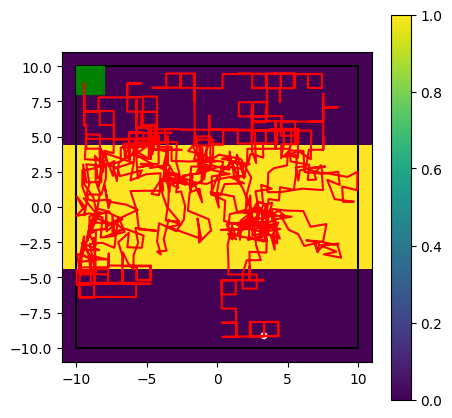

In [2]:
env_params= {
    # 'walls': [([-9.,-1.],[10., 1.])],
    'walls': [],
    'goals': [([-10.,8.],[-8.,10.])],
    'start': ([0.,-9.9],[9.9,-7.]),
    'beta': lambda s: (s[1]>-4. and s[1]<4.)
}

env = NormalMoveEnv(**env_params)
# env = NormalMoveEnv()

t = Trajectory(env, size=1_000)
t.plot(env.plot())

# RL Model

Trajectory size: 183


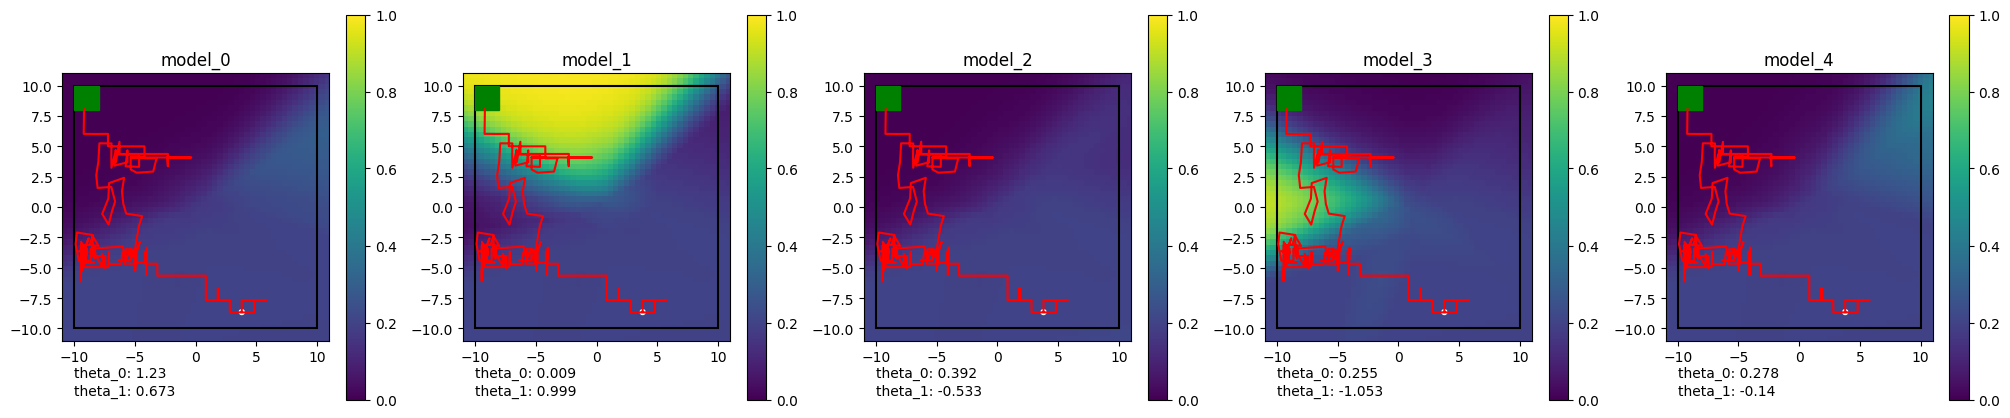

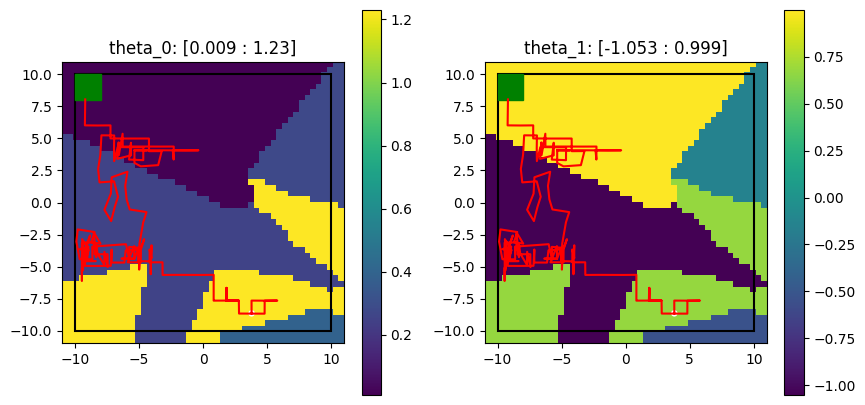

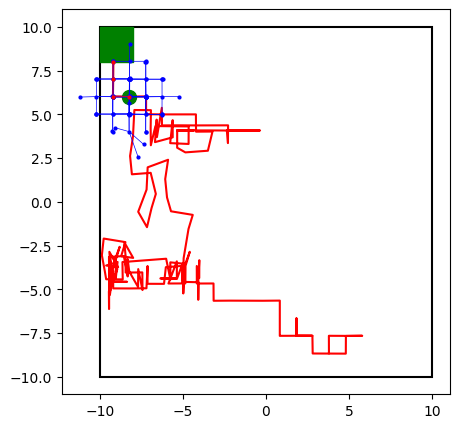

In [7]:
params = {'k':5, "lr":1e-6, 'momentum':.9}
a = Agent(env, td_model_steps=10, memory_size=0, max_plan_size=3, model=Model, **params)
a.episode(size_limit=300)
a.plot(kind='probs')
a.plot()
a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 187


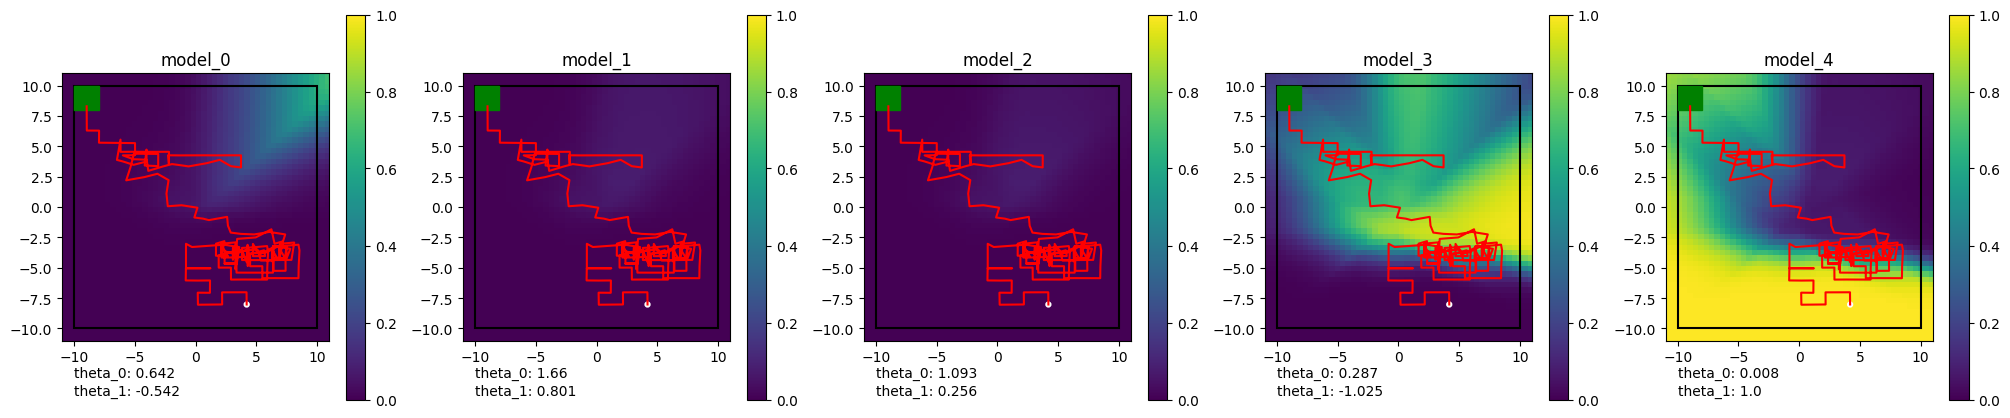

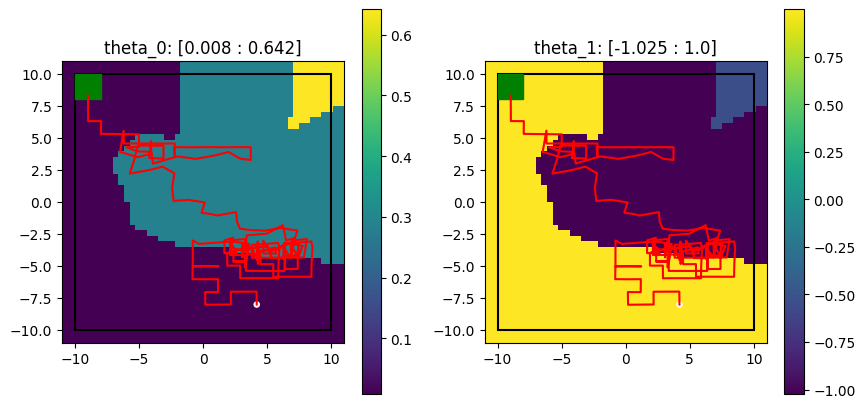

In [8]:
params = {'k':5, "lr":1e-6, 'momentum':.9}
a = Agent(env, td_model_steps=10, memory_size=0, max_plan_size=3, model=Model, **params)
a.episode(size_limit=300)
a.plot(kind='probs')
a.plot()
# a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 1
plan size: 4


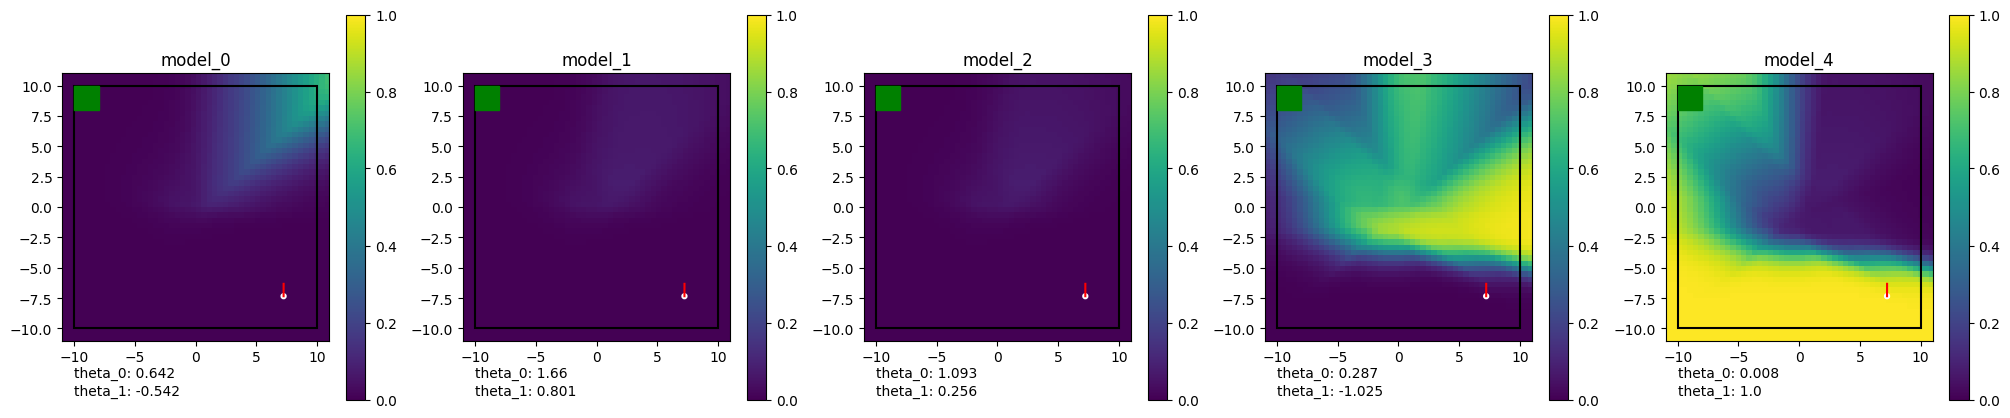

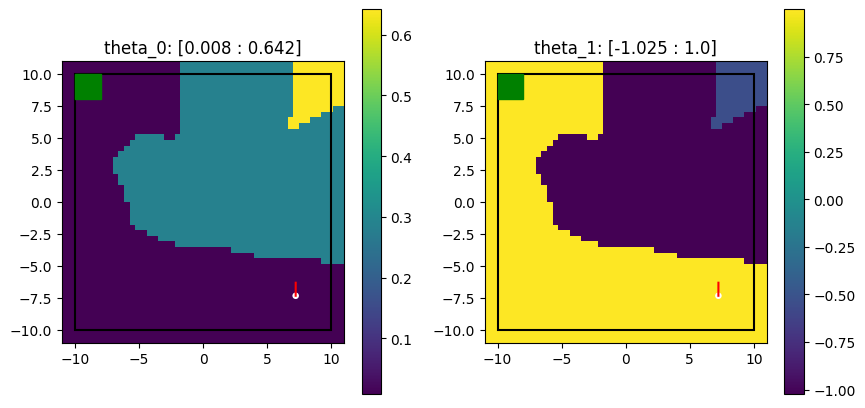

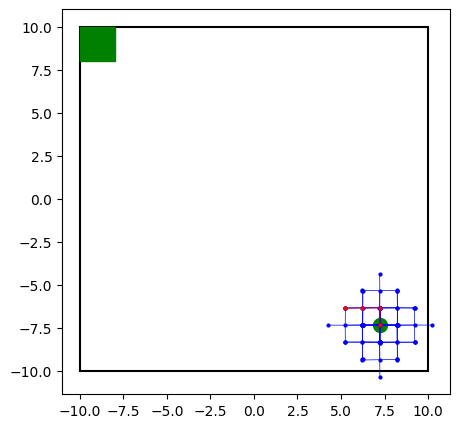

In [9]:
a.reset()
a.episode(size_limit=1)
a.plot(kind='probs')
a.plot()
a.plot(kind='plan', plan=0)
print(f'Trajectory size: {a.trajectory.run.shape[0]}')
print(f'plan size: {len(a.plans[0])}')

In [11]:
[p.cost for p in a.plans[0]][::-1]

[None, 2, 1, 1]

In [12]:
a.trajectory.run

,step,s,a,r,s_,end
0,0.0,"[7.234020081362014, -7.343011384231865]",2.0,1.0,"[7.2368627, -6.325585]",0.0


Trajectory size: 42


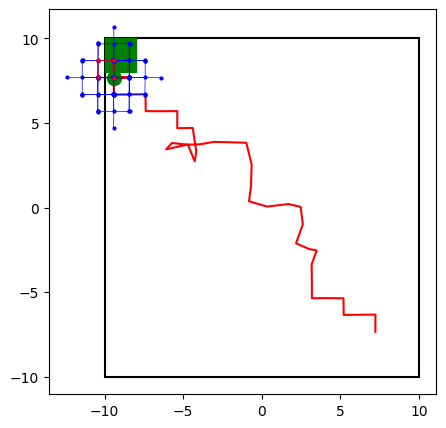

In [57]:
a.episode(size_limit=1)
# a.plot(kind='probs')
# a.plot()
a.plot(kind='plan', plan=0)
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

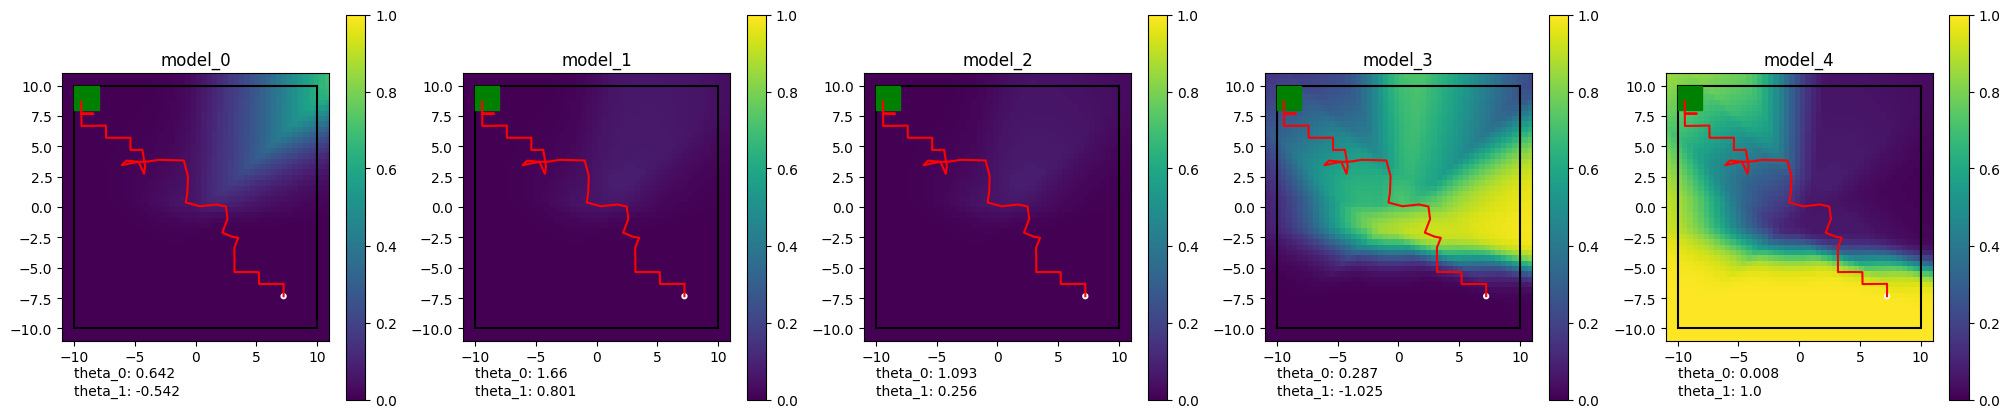

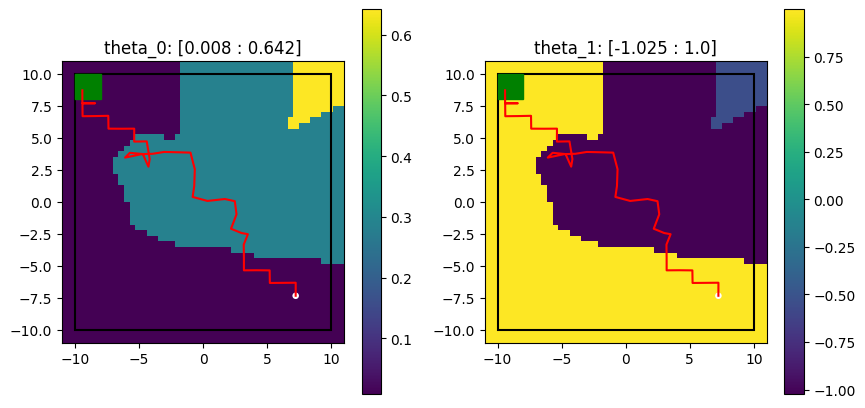

In [59]:
a.plot(kind='probs')
a.plot()

Trajectory size: 152


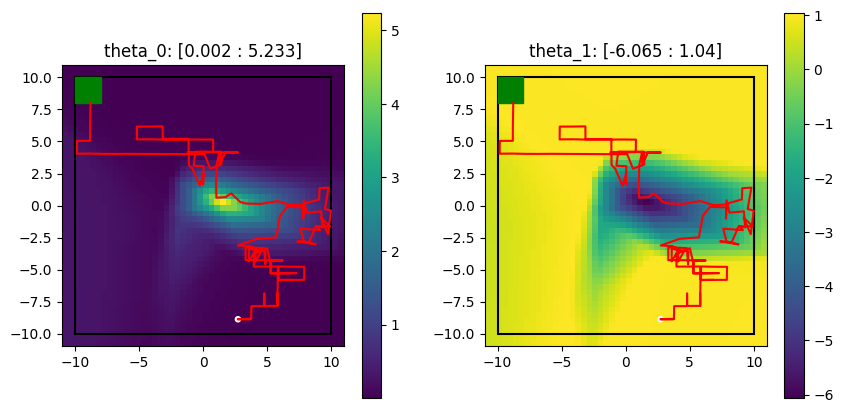

In [3]:
params = {"lr":1e-6, 'momentum':.9}
a = Agent(env, td_model_steps=10, memory_size=0, max_plan_size=50, model=GeneralModel, **params)
a.episode(size_limit=1000)
a.plot()
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 100
plan size: 28


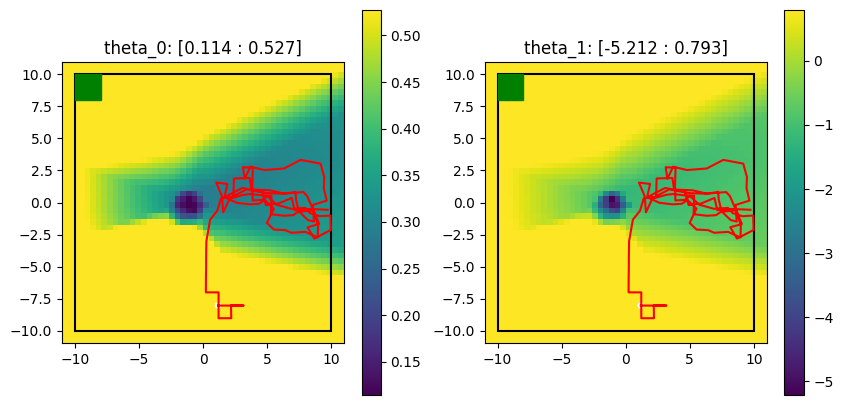

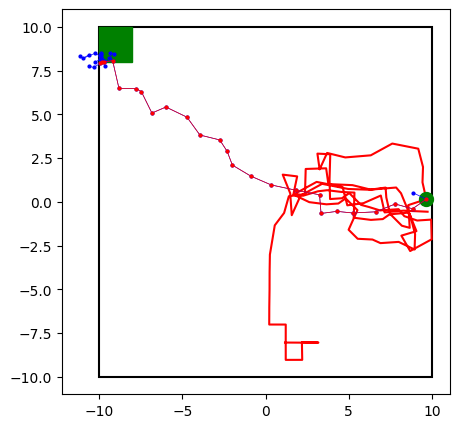

In [12]:
a.reset()
a.episode(size_limit=100)
a.plot()
a.plot(kind='plan', plan=0)
print(f'Trajectory size: {a.trajectory.run.shape[0]}')
print(f'plan size: {len(a.plans[0])}')